Diabetes Prediction using Support Vector Machine Algorithm



In [1]:
#importing necessary Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm

Data Collection and Analysis


In [3]:
#Loading dataset into the variable diabetes
diabetes=pd.read_csv(r'C:\Users\HRIDIMA K AJAY\Desktop\Works\projects\diabetes prediction system\diabetes.csv',engine='python')

In [4]:
#displaying the first 8 rows of the dataframe
diabetes.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
#checking for null values
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#checking info
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 => Non Diabetic


1 => Diabetic

In [ ]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Data Visualization

Text(0.5, 1.0, 'No of diabetic and non diabtetic individuals')

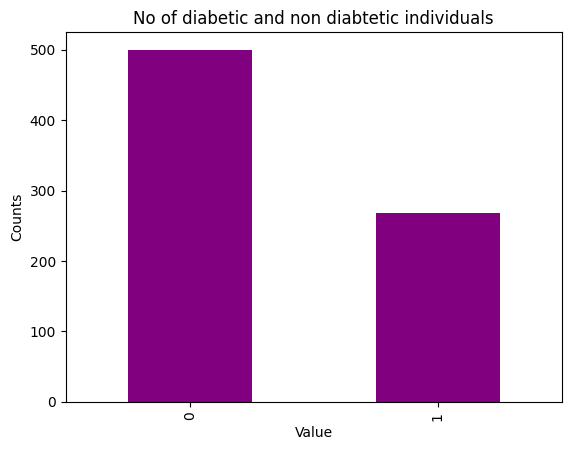

In [ ]:
diabetes['Outcome'].value_counts().plot(kind='bar',color='purple')
plt.xlabel("Value")
plt.ylabel("Counts")
plt.title("No of diabetic and non diabtetic individuals")

Visualizing the relationship between the independent variables and the target variable

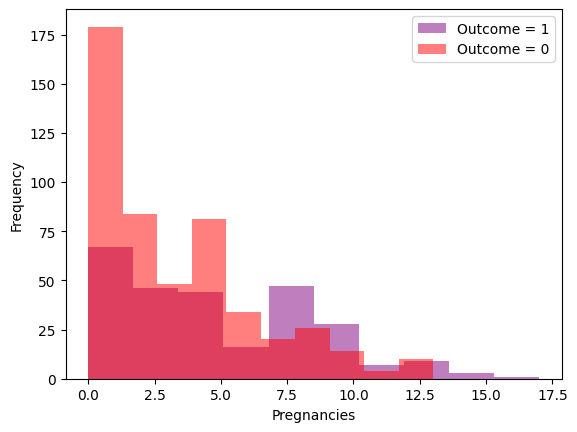

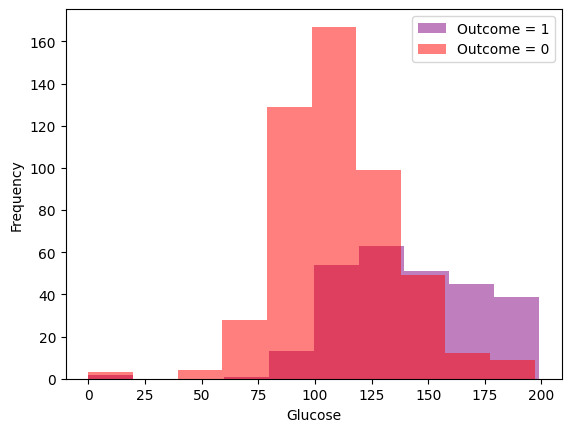

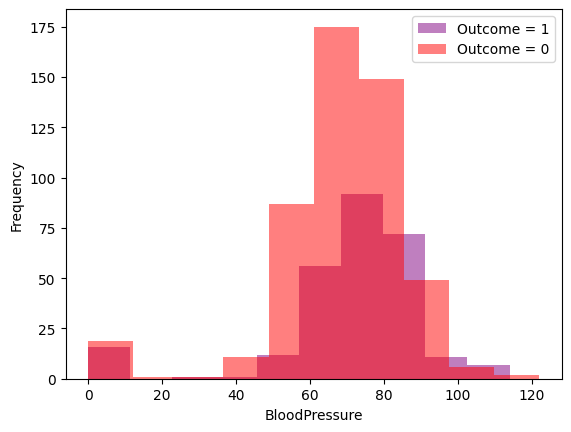

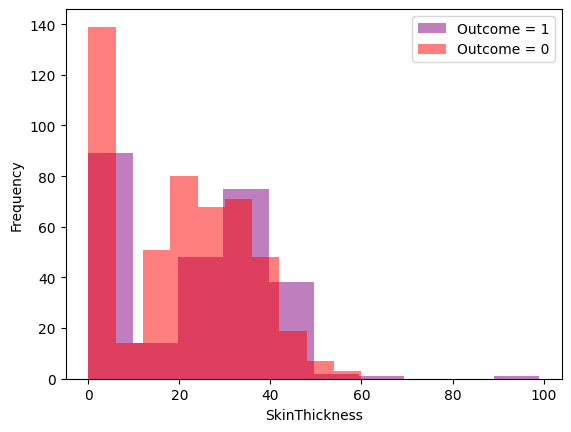

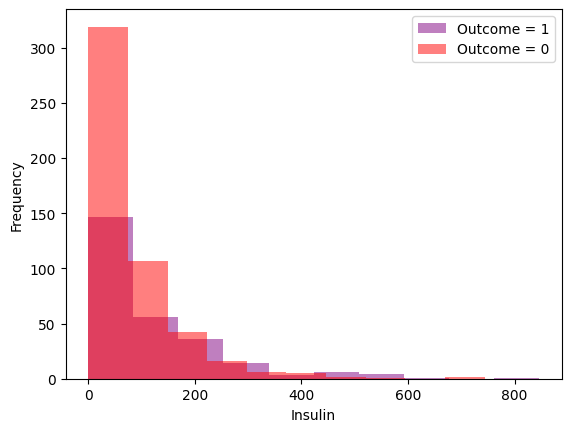

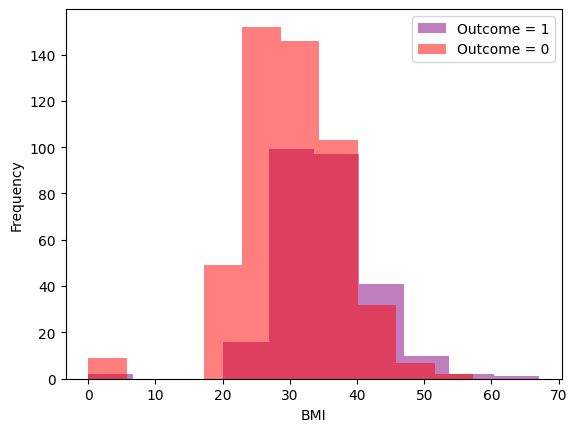

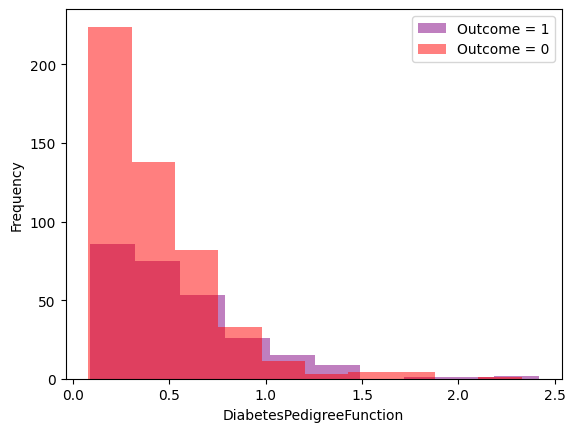

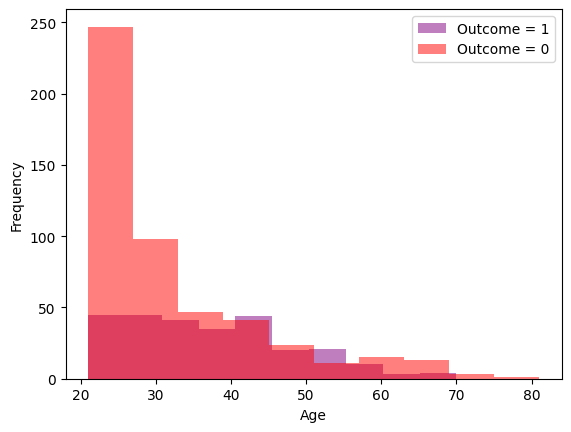

In [ ]:
for column in diabetes.columns:
    if column != 'Outcome':
        plt.hist(diabetes[column][diabetes['Outcome'] == 1], alpha=0.5, label='Outcome = 1',color='purple')
        plt.hist(diabetes[column][diabetes['Outcome'] == 0], alpha=0.5, label='Outcome = 0',color='red')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

<Axes: >

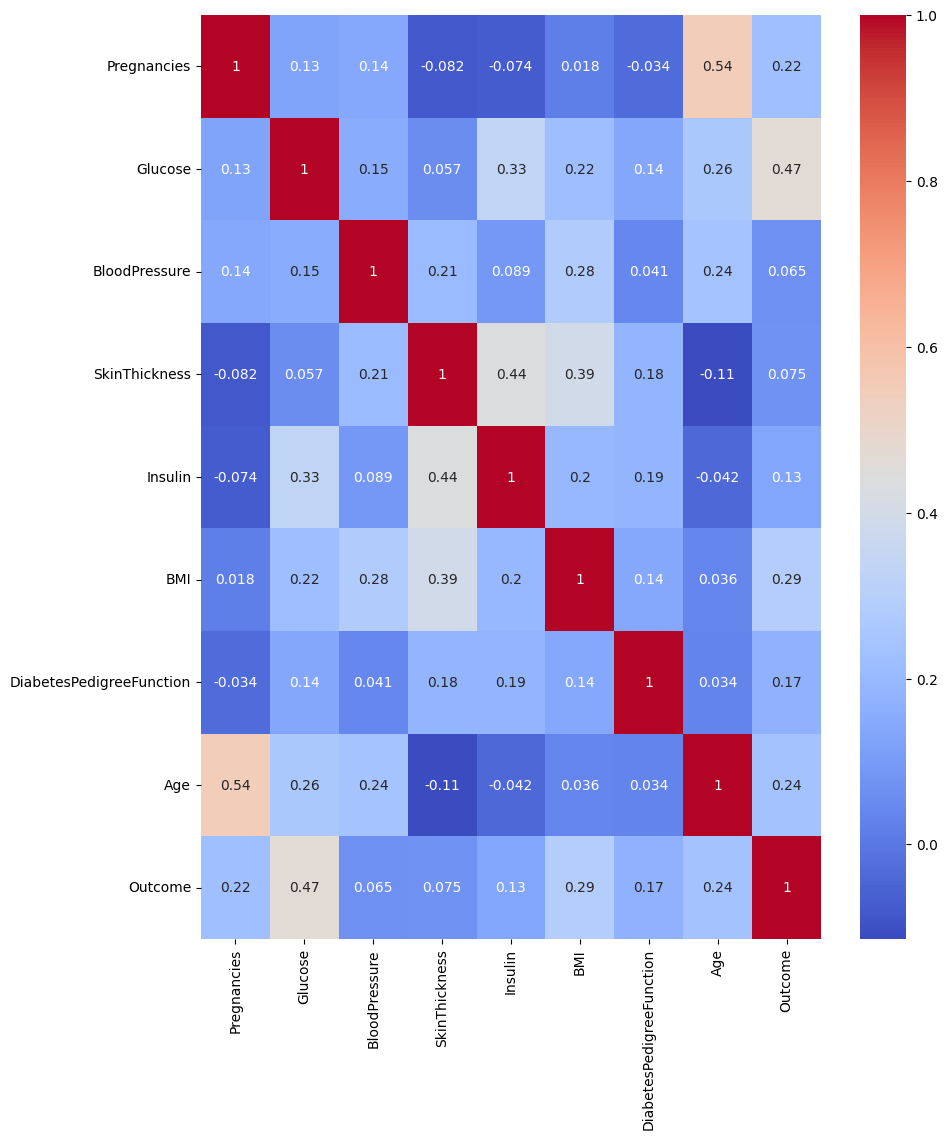

In [ ]:
plt.figure(figsize=(10,12))
sns.heatmap(diabetes.corr(),annot=True,cmap='coolwarm')

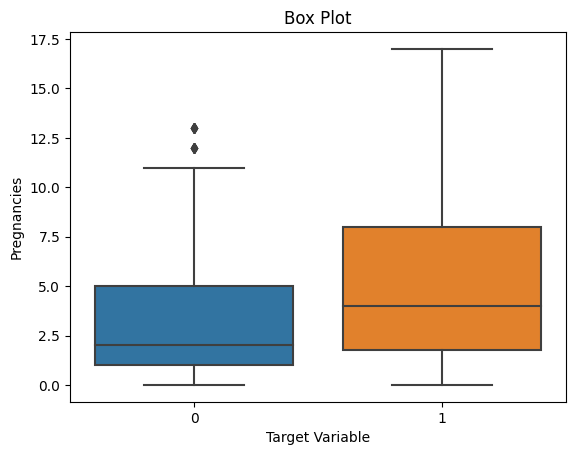

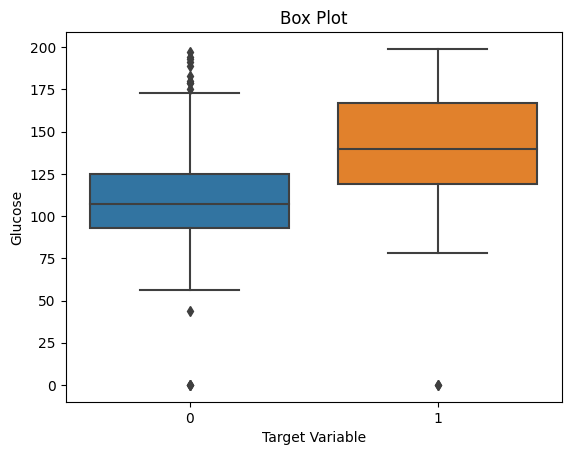

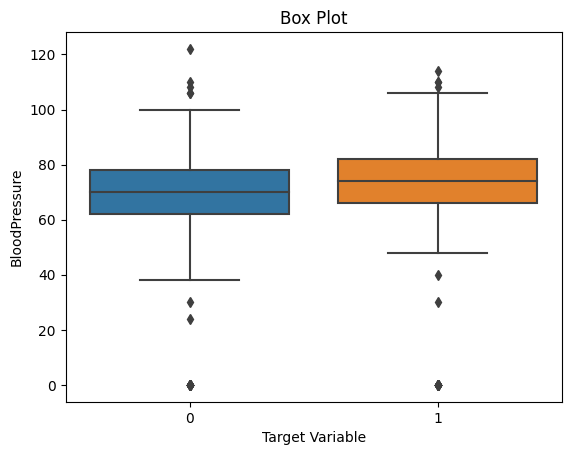

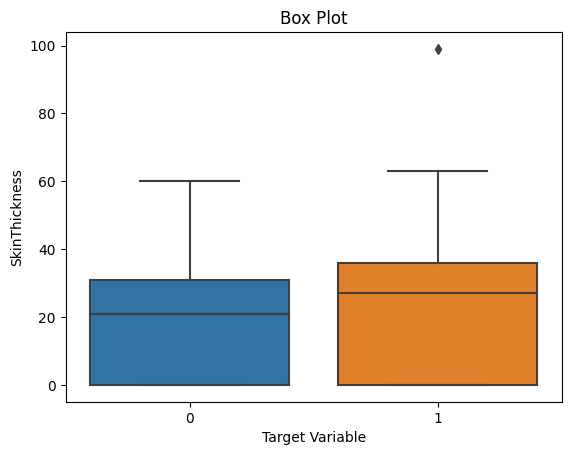

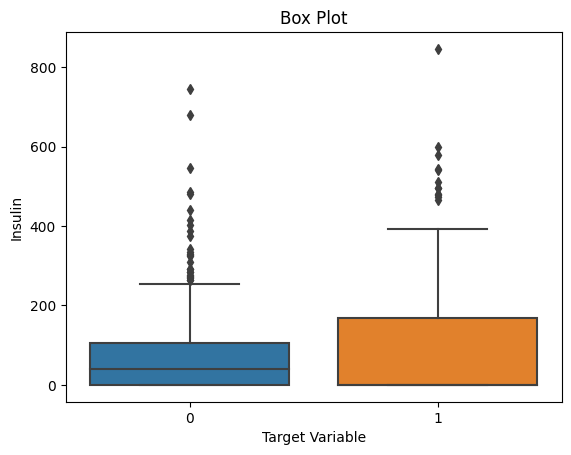

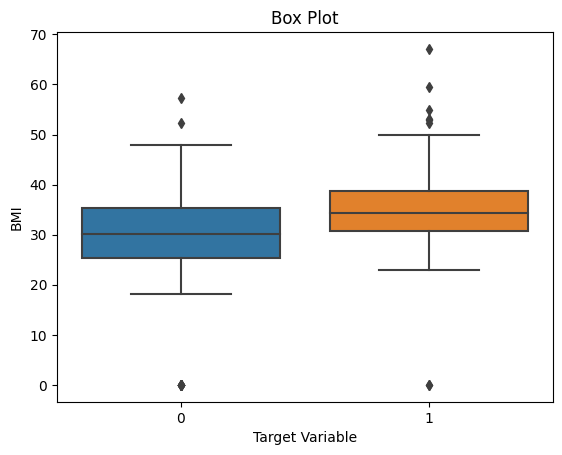

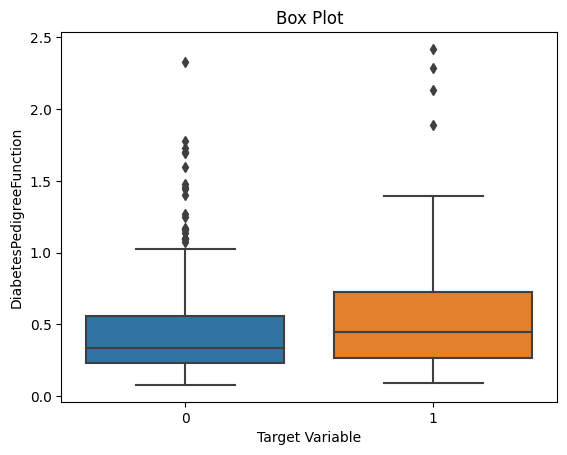

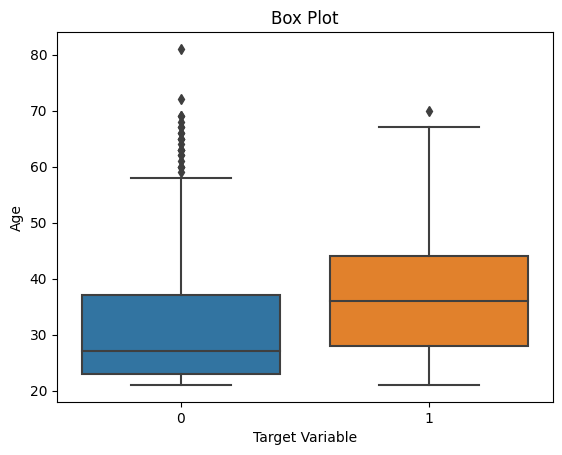

In [ ]:
for column in diabetes.drop('Outcome', axis=1):
    sns.boxplot(x='Outcome', y=column, data=diabetes)
    plt.xlabel('Target Variable')
    plt.ylabel(column)
    plt.title('Box Plot')
    plt.show()

In [ ]:
# Defining X and y labels
X=diabetes.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y=diabetes['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Data Standardization

In [ ]:
std=StandardScaler()
stddata=std.fit_transform(X)

In [ ]:
X=stddata

In [ ]:
#Splitting the data into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Model Training

In [ ]:
classifier=svm.SVC(kernel='linear')

In [ ]:
#fiiting the model
classifier.fit(X_train,y_train)

SVC(kernel='linear')

Model Evaluation

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_accuracy = accuracy_score(X_train_prediction, y_train)
training_accuracy

0.7833876221498371

In [ ]:
X_test_prediction=classifier.predict(X_test)
test_accuracy=accuracy_score(X_test_prediction,y_test)
test_accuracy

0.7272727272727273

<Axes: >

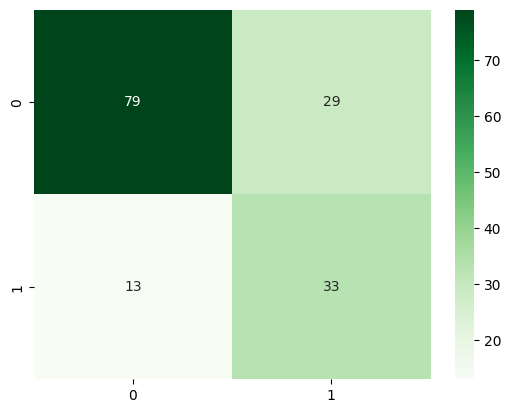

In [ ]:
cm=confusion_matrix(X_test_prediction,y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='Greens')

Making a Predictive System

In [ ]:
input_data=(5,166,72,19,175,25.8,0.587,51)
arr=np.asarray(input_data)
reshaped=arr.reshape(1,-1)
pred=classifier.predict(reshaped)
if(pred[0]==0):
  print("person is not diabetic")
else:
  print("person is diabetic")

person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename='trained_model.sav'
pickle.dump(classifier,open(filename,'wb'))

In [ ]:
# loading the saved model
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [ ]:
input_data=(5,166,72,19,175,25.8,0.587,51)
arr=np.asarray(input_data)
reshaped=arr.reshape(1,-1)
pred=loaded_model.predict(reshaped)
if(pred[0]==0):
  print("person is not diabetic")
else:
  print("person is diabetic")

person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
